# Data Exploration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [7]:
import os
print(os.getcwd())

g:\Github\NLP\Hate=speech-sinhala


In [6]:
df = pd.read_csv('Sinhala_Singlish_Hate_Speech.csv')
df_sinhala = pd.read_csv('Sinhala_Hate_Speech.csv')
#encoding='utf8'
df.head(n=10)

,PhraseNo,Phrase,IsHateSpeech
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES
5,6,"හැබැයි ඒ මේ ආණ්ඩුවේ විතරක් නෙවෙයි , රට හූරාගෙන...",YES
6,7,ලංකාව මොකක්ද.. මෙිකෙ ඉන්නෙ වාහනයක් ගත්තම අලි ඔ...,YES
7,8,Menna ratawal menna minissu. ape ratawal wala ...,YES
8,9,උඹ ලෝකයක් ඉස්සරහ හදාගත්ත නම්බුව ලංකාවේ කාලකණ්ණ...,YES
9,10,පල්ලියකට ගලක් වැදුනත් පරසක්වල ගහන මූ පන්සල් බි...,YES


## Misisng values

In [3]:
count = df.isna().sum()
precentange = df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
PhraseNo,0,0.0
Phrase,0,0.0
IsHateSpeech,0,0.0


## Distribution

In [5]:
df.groupby(['IsHateSpeech'])['IsHateSpeech'].describe()[['count']]

,count
IsHateSpeech,
NO,1397
YES,1103


In [7]:
df_sinhala.groupby(['IsHateSpeech'])['IsHateSpeech'].describe()[['count']]

,count
IsHateSpeech,
NO,750
YES,643


NO     55.88
YES    44.12
Name: IsHateSpeech, dtype: float64

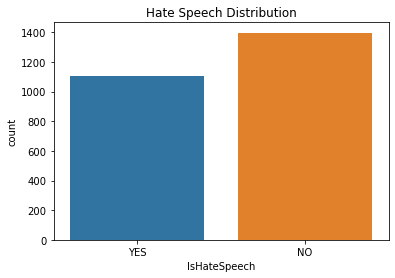

In [12]:
sns.countplot(x='IsHateSpeech', data=df).set_title('Hate Speech Distribution')
df.IsHateSpeech.value_counts(normalize=True) * 100

## Comment length

In [13]:
df['length'] = df['Phrase'].apply(len)
df.head()

,PhraseNo,Phrase,IsHateSpeech,length
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES,224
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES,99
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO,24
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES,57
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES,175


## Comment Length Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001874984A688>,
      dtype=object)

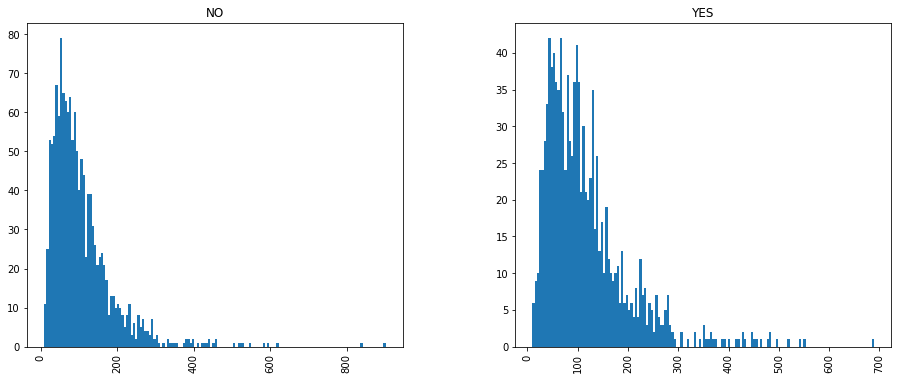

In [14]:

df.hist(column='length',by='IsHateSpeech',figsize=(15,6), bins=150)


In [17]:
df['word_count'] = df["Phrase"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["Phrase"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["Phrase"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,PhraseNo,Phrase,IsHateSpeech,length,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES,224,37,188,2,5.081081,18.500000
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES,99,17,83,4,4.882353,4.250000
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO,24,4,21,1,5.250000,4.000000
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES,57,9,49,2,5.444444,4.500000
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES,175,26,150,3,5.769231,8.666667


In [18]:
y = 'IsHateSpeech'
def check_correlation_of_text_length(x,y):
    fig,ax = plt.subplots(nrows=1,ncols=2)
    fig.suptitle(x,fontsize=12)
    for i in df[y].unique():
        sns.distplot(df[df[y]==i][x], hist=True, kde=False, bins=10, hist_kws={"alpha":0.8}, axlabel="histogram", ax=ax[0])
        sns.distplot(df[df[y]==i][x], hist=False, kde=True, kde_kws={"shade":True}, axlabel="density",ax=ax[1])
    ax[0].grid(True)
    ax[0].legend(df[y].unique())
    ax[1].grid(True)
    plt.show()

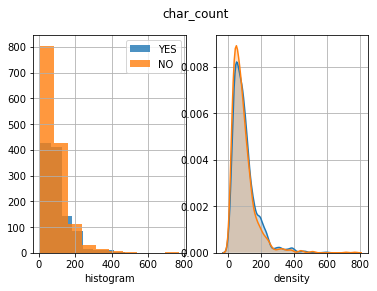

In [19]:
check_correlation_of_text_length("char_count",y)

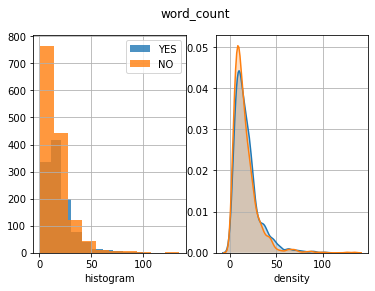

In [20]:
check_correlation_of_text_length("word_count",y)

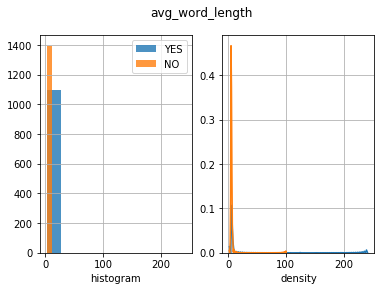

In [21]:
check_correlation_of_text_length("avg_word_length",y)

In [22]:
df[df.duplicated('Phrase')]

,PhraseNo,Phrase,IsHateSpeech,length,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
109,110,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES,224,37,188,2,5.081081,18.500000
349,350,කලාකරුවා දේශපාලනේ අතින් මොන මතය දැරුවත් මේ වගේ...,NO,123,19,105,1,5.526316,19.000000
444,445,ඇයි යකෝ පාර්ලිමේන්තුව විසුරුවා හැරියාම මෙච්චර ...,YES,142,21,122,3,5.809524,7.000000
516,517,oyaga Rail mhatayata minisu chanda Dunbar magm...,YES,132,21,112,1,5.333333,21.000000
528,529,මෙිි හුත්තිට සතුටුයිලු අපේ රටහරක්ටිකටත් සතුටුඇ...,YES,156,19,138,1,7.263158,19.000000
751,752,oba kumana paramarhhayak atthekdhay nodhanimi....,NO,303,33,271,26,8.212121,1.269231
1513,1514,මිනිස්සු ආතල් එකේ ඉන්නවට මං පට්ට කැමතියි. . හැ...,YES,190,39,152,6,3.897436,6.500000
1723,1724,මෙය දකින වාරයක් පාසා මගෙ නෙතටත් කදුලු උනනවා......,NO,162,27,136,4,5.037037,6.750000
1993,1994,Nuugath sadachara kamak nethi un balayata apuw...,YES,100,14,87,3,6.214286,4.666667
1995,1996,වටෙම්ම ලියුම් ඉස්සෙල්ලත් ආවා ඒවා ඇහුවනම් අද කො...,YES,103,17,87,5,5.117647,3.400000


In [23]:
df.duplicated('Phrase').sum()

11

In [24]:
exclude = set(",.:;'\"-?!/´`%")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

## Remove puntuation

In [25]:
df['cleaned'] = df['Phrase'].apply(lambda x: removePunctuation(x))
df.head()

,PhraseNo,Phrase,IsHateSpeech,length,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,cleaned
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES,224,37,188,2,5.081081,18.500000,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES,99,17,83,4,4.882353,4.250000,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO,24,4,21,1,5.250000,4.000000,සංහිදියාවට අවුලක් වෙයි ද
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES,57,9,49,2,5.444444,4.500000,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES,175,26,150,3,5.769231,8.666667,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...


## Remove numbers

In [26]:
df['cleaned'] = df['cleaned'].apply(lambda x: removeNumbers(x))
df.head()

,PhraseNo,Phrase,IsHateSpeech,length,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,cleaned
0,1,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...,YES,224,37,188,2,5.081081,18.500000,මේ බැල්ලි කොටින්ගේ ගු කනකොට අපහසුවක් දැනුනෙ නැ...
1,2,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...,YES,99,17,83,4,4.882353,4.250000,මන් ඊයේ මුස්ලිම් ඩෑල් එකක් එක්ක සෙල්ෆියක් ගත්ත...
2,3,සංහිදියාවට අවුලක් වෙයි ද,NO,24,4,21,1,5.250000,4.000000,සංහිදියාවට අවුලක් වෙයි ද
3,4,.කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...,YES,57,9,49,2,5.444444,4.500000,කටින් පුරසාරම් දොඩන අපි සිංහලයො විදියට ලැජ්ජා...
4,5,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...,YES,175,26,150,3,5.769231,8.666667,මචන් ඔය මගුල නවත්තලා කොන්දක් තියෙනවානම් පුලුවන...


## Most Common words in Dataset

In [29]:
from collections import Counter

plt.rc('font', family='Lohit Devanagari')

results = Counter()
df.cleaned.str.split().apply(results.update)

most = results.most_common(20)
most

[('මේ', 418),
 ('එක', 300),
 ('නෑ', 265),
 ('වගේ', 205),
 ('අපේ', 199),
 ('කරන්න', 186),
 ('ඒ', 174),
 ('කියලා', 164),
 ('ඉන්න', 154),
 ('නම්', 152),
 ('උන්', 141),
 ('අපි', 135),
 ('eka', 127),
 ('එකක්', 121),
 ('මිනිස්සු', 118),
 ('හරි', 118),
 ('me', 109),
 ('තමයි', 106),
 ('කියල', 105),
 ('රට', 104)]

## Most common words in Hate label

In [32]:
words = [word for i in df[df['IsHateSpeech'] == 'YES']['cleaned'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(40)
    
most

[('මේ', 213),
 ('එක', 134),
 ('නෑ', 127),
 ('වගේ', 117),
 ('කියලා', 94),
 ('උන්', 87),
 ('ඉන්න', 85),
 ('අපේ', 72),
 ('නම්', 69),
 ('කරන්න', 69),
 ('හරි', 69),
 ('me', 63),
 ('නැති', 59),
 ('එකක්', 58),
 ('අපි', 56),
 ('තමයි', 55),
 ('රට', 54),
 ('වලට', 53),
 ('ඒ', 52),
 ('දැන්', 52),
 ('එපා', 51),
 ('මුන්', 51),
 ('මිනිස්සු', 49),
 ('කාලකන්නි', 48),
 ('කරලා', 47),
 ('කරන', 47),
 ('ඔය', 46),
 ('යකෝ', 46),
 ('ගන්න', 46),
 ('eka', 45),
 ('ටික', 45),
 ('කියල', 44),
 ('පක්කු', 44),
 ('ගොන්', 43),
 ('එක්ක', 42),
 ('වෙන්න', 42),
 ('වෙලා', 41),
 ('ගැන', 40),
 ('හෙන', 40),
 ('ඒක', 39)]

## Most Common words in Non hate label

In [33]:
words = [word for i in df[df['IsHateSpeech'] == 'NO']['cleaned'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(30)
    
most

[('මේ', 205),
 ('එක', 166),
 ('නෑ', 138),
 ('අපේ', 127),
 ('ඒ', 122),
 ('කරන්න', 117),
 ('වගේ', 88),
 ('නම්', 83),
 ('eka', 82),
 ('අපි', 79),
 ('කියලා', 70),
 ('ඉන්න', 69),
 ('මිනිස්සු', 69),
 ('මම', 65),
 ('එකක්', 63),
 ('කියල', 61),
 ('කරන', 54),
 ('උන්', 54),
 ('කරලා', 54),
 ('රටේ', 54),
 ('ගන්න', 53),
 ('ගැන', 53),
 ('තමයි', 51),
 ('ඔය', 50),
 ('ඔබ', 50),
 ('රට', 50),
 ('හරි', 49),
 ('වඩා', 46),
 ('දෙන්න', 46),
 ('me', 46)]